<a href="https://colab.research.google.com/github/archie-sinha/Reinforcement-Learning/blob/main/RL_4_Policy_Grid_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R054 - Archisha Sinha
# MBA Tech AI

## Domain: Reinforcement Learning
## Topic: Implementation of Grid World - Value Iteration

## Policy Iteration in Grid World:

Policy Iteration is a dynamic programming algorithm used to solve Markov Decision Processes (MDPs) in environments like grid worlds.

The process involves two main steps:

1. Policy Evaluation: Starting with an arbitrary policy (a set of actions for each state), the algorithm calculates the value function for each state. This value represents the expected cumulative reward if the agent follows the current policy from that state.

2. Policy Improvement: The algorithm updates the policy by choosing actions that maximize the expected value, based on the current value function. This creates a new policy that is typically better than the previous one.

These steps repeat until the policy converges, meaning no further improvements can be made. The resulting policy is the optimal policy, providing the best possible actions to maximize rewards in each state of the grid world.

In grid world scenarios, this means the agent learns the best way to navigate the grid to achieve the highest possible rewards, while avoiding obstacles and considering terminal states.

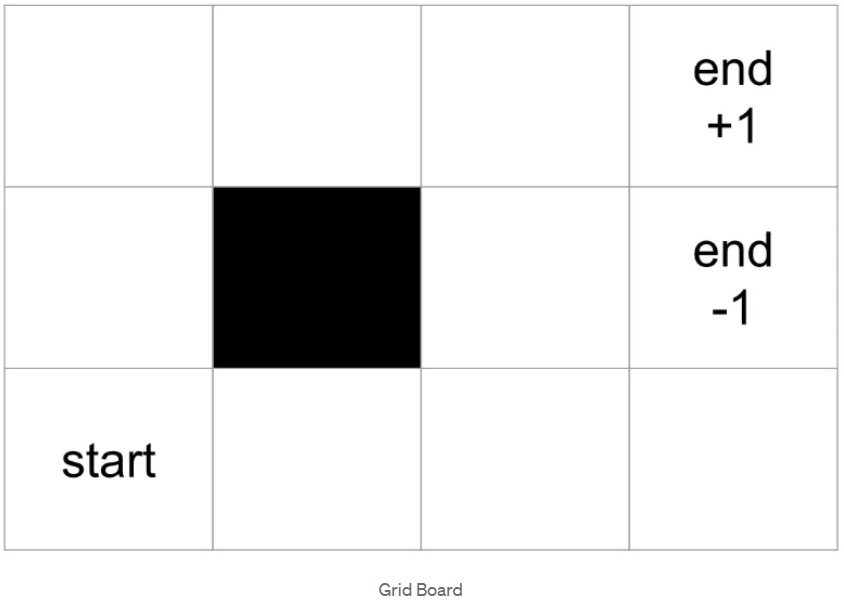

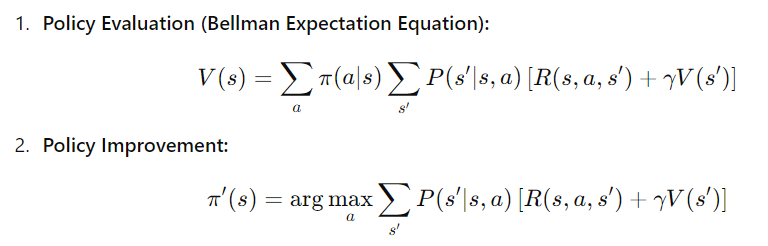

In [1]:
import numpy as np

In [2]:
# Define the grid world parameters
rows = 3
cols = 4
gamma = 1.0  # Discount factor
theta = 1e-4  # Convergence threshold

In [3]:
# Initialize the grid world
V = np.zeros((rows, cols))
policy = np.ones([rows, cols, 4]) / 4  # Equal probability for each action (up, down, left, right)

In [5]:
# Define the rewards and its terminal states
rewards = np.zeros((rows, cols))
rewards[0, 3] = 1  # +1 reward at the top-right corner
rewards[1, 3] = -1  # -1 reward at the middle-right
terminal_states = [(0, 3), (1, 3)]

# Define the obstacle position
obstacle = (1, 1)

In [6]:
# Defining the possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

In [7]:
# Policy Iteration
while True:
    # Policy Evaluation
    while True:
        delta = 0
        new_V = np.copy(V)
        for i in range(rows):
            for j in range(cols):
                if (i, j) in terminal_states or (i, j) == obstacle:
                    continue
                v = V[i, j]
                new_value = 0
                for a, action in enumerate(actions):
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < rows and 0 <= nj < cols and (ni, nj) != obstacle:
                        new_value += policy[i, j, a] * (rewards[ni, nj] + gamma * V[ni, nj])
                    else:  # If out of bounds or into obstacle, stay in the same state
                        new_value += policy[i, j, a] * (rewards[i, j] + gamma * V[i, j])
                new_V[i, j] = new_value
                delta = max(delta, abs(v - new_value))
        V = new_V
        if delta < theta:
            break

    # Policy Improvement
    policy_stable = True
    new_policy = np.copy(policy)
    for i in range(rows):
        for j in range(cols):
            if (i, j) in terminal_states or (i, j) == obstacle:
                continue
            old_action = np.argmax(policy[i, j])
            action_values = np.zeros(4)
            for a, action in enumerate(actions):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < rows and 0 <= nj < cols and (ni, nj) != obstacle:
                    action_values[a] = rewards[ni, nj] + gamma * V[ni, nj]
                else:  # If out of bounds or into obstacle, stay in the same state
                    action_values[a] = rewards[i, j] + gamma * V[i, j]
            new_action = np.argmax(action_values)
            new_policy[i, j] = np.eye(4)[new_action]
            if old_action != new_action:
                policy_stable = False

    policy = new_policy
    if policy_stable:
        break

In [8]:
print("Optimal Policy (0: Up, 1: Down, 2: Left, 3: Right):")
print(np.argmax(policy, axis=2))

Optimal Policy (0: Up, 1: Down, 2: Left, 3: Right):
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]]


In [9]:
print("Optimal Value Function:")
print(V)

Optimal Value Function:
[[1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]]


### Conclusion:

- The code iteratively finds the optimal policy for a 3x4 grid world, maximizing expected rewards.
- It handles obstacles and boundaries, ensuring valid movements within the grid.
- The value function is computed for each state, representing expected rewards.
- The process guarantees convergence to the optimal policy and value function.